# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset

In [2]:
dataset = pd.read_csv('datasets/Position_Salaries.csv')

In [3]:
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [5]:
print(X[:5])

[[1]
 [2]
 [3]
 [4]
 [5]]


In [6]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# Feature Scaling

```
We need to scale all features/ targets if they are not in range 0-1.
Here we'll have to scale both X and y

StandardScaler computes mean and std on the dataset it fits on, so do not use same instance on both independent and dependent variables.
```

In [7]:
from sklearn.preprocessing import StandardScaler

feature_scaler = StandardScaler()
target_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X)
y_train = target_scaler.fit_transform(y.reshape(len(y),1))

print(X_train[:5])
print(y_train[:5])

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]]


In [8]:
target_scaler.inverse_transform([[-0.72004253]])

array([[44999.99863029]])

# Create model

In [9]:
y_train.reshape(len(y_train),)

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

In [10]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train.reshape(len(y_train),))

SVR()

# Predicting new value

In [11]:
position = 4
predicted = svr.predict(feature_scaler.transform([[position]]))
predicted_salary = target_scaler.inverse_transform(predicted)
print(np.round(predicted_salary[0]))

108255.0


# Plotting

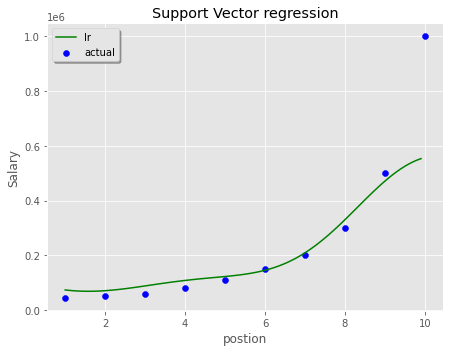

In [12]:
from matplotlib import gridspec
plt.style.use('ggplot')

fig = plt.figure(figsize=(12,5))
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1,1])
ax1 = fig.add_subplot(gs[0])

ax1.scatter(X, y, c='b', label='actual')

granular_x = np.arange(min(X), max(X), 0.1)
x_axis = granular_x.reshape(len(granular_x), 1)
y_axis = target_scaler.inverse_transform(svr.predict(feature_scaler.transform(x_axis)))
ax1.plot(x_axis, y_axis, c='g', label='lr')

ax1.set_xlabel('postion')
ax1.set_ylabel('Salary')
ax1.set_title('Support Vector regression')
# ax1.legend(loc='upper left', bbox_to_anchor=(1,1))
ax1.legend(shadow=True)

plt.tight_layout()